<a href="https://colab.research.google.com/github/SujithSaiSripadam/Deep_Learning/blob/main/mnist_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Conv2D ,MaxPool2D , Dropout
from tensorflow.keras.metrics import categorical_crossentropy , Accuracy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import to_categorical


In [ ]:
(xtest,ytest),(xtrain,ytrain) = tf.keras.datasets.mnist.load_data()

In [ ]:
len(xtest)

60000

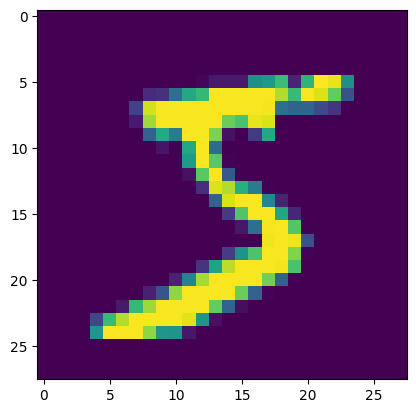

In [ ]:
image = xtest[0]
plt.imshow(image)
plt.plot()
label = ytest[0]


In [ ]:
image.shape

(28, 28)

In [ ]:
print(label)

5


In [ ]:
classes= ['0','1','2','3','4','5','6','7','8','9']
num_classes = 10

In [ ]:
xtest = xtest/255.
xtrain = xtrain/255.

xtest=xtest.reshape(-1,28,28,1)
xtrain=xtrain.reshape(-1,28,28,1)
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [ ]:
epochs = 10
lr = 0.005
batch = 32

In [ ]:
from keras.metrics.confusion_metrics import activations
model = Sequential([
    #Flatten(input_shape=(28, 28)),
    Conv2D(32,(3,3),activation='relu',input_shape=(28, 28, 1)),
    MaxPool2D(),
    Conv2D(64,(3,3),activation = 'relu',input_shape=(28, 28, 1)),
    MaxPool2D(),

    Flatten(),
    Dropout(0.5),
    Dense(256,activation='relu'),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [ ]:
model.compile(optimizer = Adam(learning_rate= 0.005),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(xtrain,ytrain, batch_size=batch, epochs=epochs)


Epoch 1/10
313/313 [==============================] - 13s 38ms/step - loss: 0.3506 - accuracy: 0.8878
Epoch 2/10
313/313 [==============================] - 12s 37ms/step - loss: 0.1546 - accuracy: 0.9520
Epoch 3/10
313/313 [==============================] - 11s 34ms/step - loss: 0.1271 - accuracy: 0.9636
Epoch 4/10
313/313 [==============================] - 12s 37ms/step - loss: 0.1097 - accuracy: 0.9680
Epoch 5/10
313/313 [==============================] - 12s 37ms/step - loss: 0.0916 - accuracy: 0.9725
Epoch 6/10
313/313 [==============================] - 12s 37ms/step - loss: 0.0893 - accuracy: 0.9745
Epoch 7/10
313/313 [==============================] - 13s 41ms/step - loss: 0.0758 - accuracy: 0.9775
Epoch 8/10
313/313 [==============================] - 12s 37ms/step - loss: 0.0841 - accuracy: 0.9766
Epoch 9/10
313/313 [==============================] - 15s 49ms/step - loss: 0.0683 - accuracy: 0.9796
Epoch 10/10
313/313 [==============================] - 12s 38ms/step - loss: 0.062

In [ ]:
model.evaluate(xtest,ytest)

1875/1875 [==============================] - 20s 11ms/step - loss: 0.1090 - accuracy: 0.9765


[0.10898198187351227, 0.9764999747276306]

In [ ]:
ypred = model.predict(xtest)
ypred_labels = tf.argmax(ypred, axis=1)

1875/1875 [==============================] - 21s 11ms/step


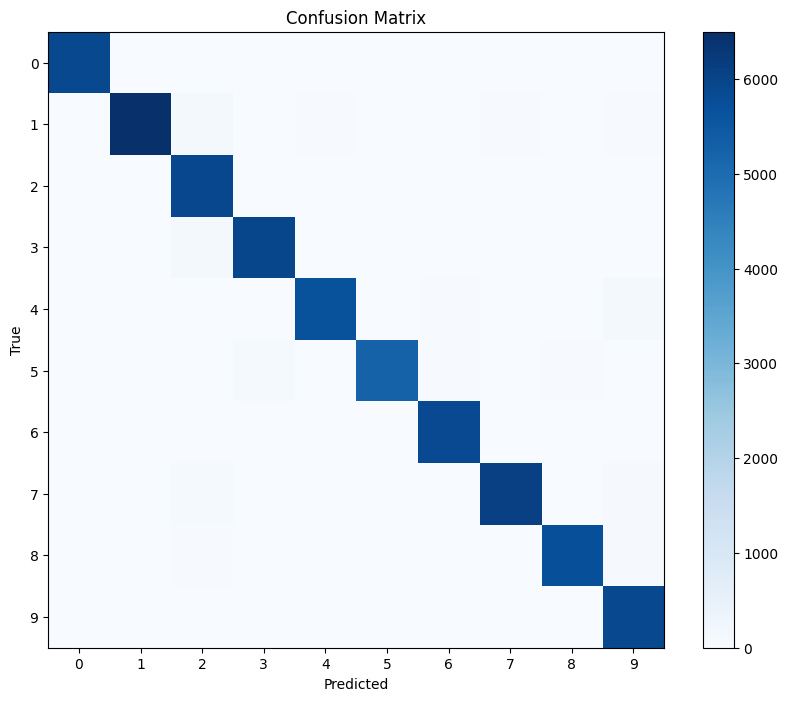

In [ ]:
from sklearn.metrics import confusion_matrix
ytest_labels = tf.argmax(ytest, axis=1)
cm = confusion_matrix(ytest_labels, ypred_labels)
import numpy as np
plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.show()


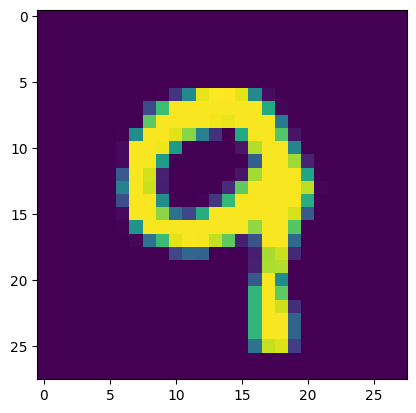

In [ ]:
image = xtrain[99]
plt.imshow(image)

In [ ]:
image = xtrain[99]
image = np.expand_dims(image, axis=0)
np.argmax(model.predict(image))


1/1 [==============================] - 0s 82ms/step


9

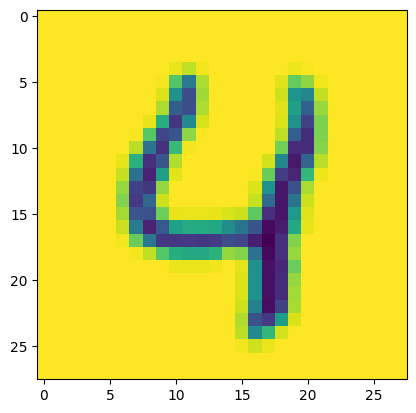

In [ ]:
import requests
from PIL import Image

url = "https://miro.medium.com/v2/resize:fit:282/1*xpszL7jJrV5UTV7Xa-fgWQ.png"

response = requests.get(url, stream=True)
response.raise_for_status()
image = Image.open(response.raw).convert('L')
image = image.resize((28,28))
image = np.array(image)
image = image.reshape(28,28,1)
plt.imshow(image)

In [ ]:
image = np.expand_dims(image,axis = 0)

In [ ]:
np.argmax(model.predict(image))

1/1 [==============================] - 0s 38ms/step


2

NameError: ignored